In [68]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline


In [2]:
data_train = pd.read_csv("train.csv") #прочитали данные
data_test = pd.read_csv("test.csv")

In [3]:
data_train.head() #посмотрели на тренировочные

,company_ID,is_bankrupt,L4end_2016,U1end_2016,FL_2016,K11_2016,KOCC_2016,Inv_2016,f2_2016,RX_2016,index_old,Actual_tax_debtor(month),Tax_debtor
0,1124682,0,1.504576,0.363006,1.754774,9316.0,0.335289,8.705542,True,0.359868,0.832951,0,0
1,1183120,0,0.982846,0.017605,55.801703,-4610.0,-0.017453,0.510927,True,0.007900,0.366090,0,0
2,1050569,0,0.937943,-0.065156,-16.347826,-69.0,-0.065217,-inf,True,0.078376,0.407549,0,0
3,240256,0,22.220588,0.968416,0.032614,1443.0,0.954997,3.247664,True,3.597771,0.911264,0,1
4,346465,0,1.007559,0.412071,1.426769,-30469.0,-0.102096,0.883257,True,0.010320,0.530196,0,1


In [4]:
data_test.head() #посмотрели на тестовые

,company_ID,L4end_2016,U1end_2016,FL_2016,K11_2016,KOCC_2016,Inv_2016,f2_2016,RX_2016,Actual_tax_debtor(month),Tax_debtor
0,199497,6.663477,0.849928,0.176570,3551.0,0.849928,inf,True,0.845141,0,0
1,80993,3.462140,0.724863,0.379571,40613.0,0.711161,15.280239,True,-0.362557,0,0
2,773807,1.837004,0.513919,0.945833,190.0,0.455635,4.800000,True,0.513919,0,0
3,993975,2.021261,0.505259,0.979182,1393.0,0.505259,inf,True,0.182082,0,0
4,237791,8.030100,0.146606,5.821023,2816.0,0.146606,inf,True,0.012807,0,0


In [5]:
data_train.describe() #описательные статистики тренировочных, есть +- inf, нужно их заменить (на медиану или линейную регрессию)

,company_ID,is_bankrupt,L4end_2016,U1end_2016,FL_2016,K11_2016,KOCC_2016,Inv_2016,RX_2016,index_old,Actual_tax_debtor(month),Tax_debtor
count,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06,1.047844e+06
mean,7.819978e+05,6.589721e-03,inf,-2.535490e+00,1.292170e+03,-3.195490e+04,NaN,NaN,-6.503586e-01,6.127904e-01,9.543405e-03,1.563926e-01
std,4.514496e+05,8.090923e-02,NaN,1.976928e+02,1.269717e+06,8.508817e+06,NaN,NaN,1.403118e+02,2.492607e-01,9.722313e-02,3.632273e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.209105e+05,-5.954435e+05,-6.502623e+09,-inf,-inf,-1.209110e+05,6.389161e-02,0.000000e+00,0.000000e+00
25%,3.910628e+05,0.000000e+00,1.003012e+00,1.615545e-02,1.204192e-03,-6.400000e+01,-6.051102e-02,5.611561e-01,0.000000e+00,4.674891e-01,0.000000e+00,0.000000e+00
50%,7.815835e+05,0.000000e+00,1.400458e+00,2.636285e-01,5.438513e-01,1.490000e+02,1.660044e-01,6.957047e+01,2.023501e-02,6.573138e-01,0.000000e+00,0.000000e+00
75%,1.173116e+06,0.000000e+00,5.412083e+00,7.872883e-01,5.441646e+00,1.490000e+03,7.317073e-01,inf,1.693367e-01,8.289478e-01,0.000000e+00,0.000000e+00
max,1.563946e+06,1.000000e+00,inf,2.000000e+00,1.299734e+09,3.201868e+08,inf,inf,4.336250e+04,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
data_test.describe()#описательные статистики тестовых, есть +- inf, нужно их заменить (на медиану или линейную регрессию)

,company_ID,L4end_2016,U1end_2016,FL_2016,K11_2016,KOCC_2016,Inv_2016,RX_2016,Actual_tax_debtor(month),Tax_debtor
count,5.161030e+05,5.161030e+05,516103.000000,5.161030e+05,5.161030e+05,5.161030e+05,5.161030e+05,516103.000000,516103.000000,516103.000000
mean,7.819226e+05,inf,-2.338125,6.481729e+01,-1.667668e+04,NaN,NaN,-0.151515,0.009640,0.155548
std,4.515201e+05,NaN,141.707574,4.843373e+03,2.233788e+06,NaN,NaN,152.386771,0.097707,0.362427
min,4.000000e+00,0.000000e+00,-61759.000000,-1.659522e+05,-5.091220e+08,-inf,-inf,-19380.000000,0.000000,0.000000
25%,3.908265e+05,1.003253e+00,0.016356,1.066800e-03,-6.200000e+01,-5.908594e-02,5.681019e-01,0.000000,0.000000,0.000000
50%,7.827370e+05,1.398283e+00,0.263456,5.433301e-01,1.500000e+02,1.660606e-01,7.017647e+01,0.020202,0.000000,0.000000
75%,1.172660e+06,5.408232e+00,0.787109,5.401378e+00,1.488500e+03,7.318140e-01,inf,0.169815,0.000000,0.000000
max,1.563943e+06,inf,2.000000,2.326323e+06,7.504270e+08,inf,inf,100692.588235,1.000000,1.000000


In [7]:
data_train.info() #инфо по тренировочным, нет null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047844 entries, 0 to 1047843
Data columns (total 13 columns):
company_ID                  1047844 non-null int64
is_bankrupt                 1047844 non-null int64
L4end_2016                  1047844 non-null float64
U1end_2016                  1047844 non-null float64
FL_2016                     1047844 non-null float64
K11_2016                    1047844 non-null float64
KOCC_2016                   1047844 non-null float64
Inv_2016                    1047844 non-null float64
f2_2016                     1047844 non-null bool
RX_2016                     1047844 non-null float64
index_old                   1047844 non-null float64
Actual_tax_debtor(month)    1047844 non-null int64
Tax_debtor                  1047844 non-null int64
dtypes: bool(1), float64(8), int64(4)
memory usage: 96.9 MB


In [8]:
missing_data = [] #есть +-inf в тренировочных, их количество, попробуем удалить Inv_2016, остальные заменить на медиану
for i in data_train:
    missing_data.append(np.isinf(data_train.get(i)).sum())
missing_data_column = data_train.columns.get_values()
missing_dict = dict(zip(missing_data_column.tolist(),missing_data))
missing_dict

{'company_ID': 0,
 'is_bankrupt': 0,
 'L4end_2016': 82418,
 'U1end_2016': 0,
 'FL_2016': 0,
 'K11_2016': 0,
 'KOCC_2016': 4457,
 'Inv_2016': 595690,
 'f2_2016': 0,
 'RX_2016': 0,
 'index_old': 0,
 'Actual_tax_debtor(month)': 0,
 'Tax_debtor': 0}

In [9]:
data_test.info()#инфо по тестовым

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516103 entries, 0 to 516102
Data columns (total 11 columns):
company_ID                  516103 non-null int64
L4end_2016                  516103 non-null float64
U1end_2016                  516103 non-null float64
FL_2016                     516103 non-null float64
K11_2016                    516103 non-null float64
KOCC_2016                   516103 non-null float64
Inv_2016                    516103 non-null float64
f2_2016                     516103 non-null bool
RX_2016                     516103 non-null float64
Actual_tax_debtor(month)    516103 non-null int64
Tax_debtor                  516103 non-null int64
dtypes: bool(1), float64(7), int64(3)
memory usage: 39.9 MB


In [10]:
missing_data = []  #есть +-inf в тестовых, их количество, попробуем удалить Inv_2016, остальные заменить на медиану
for i in data_test:
    missing_data.append(np.isinf(data_test.get(i)).sum())
missing_data_column = data_test.columns.get_values()
missing_dict = dict(zip(missing_data_column.tolist(),missing_data))
missing_dict

{'company_ID': 0,
 'L4end_2016': 40688,
 'U1end_2016': 0,
 'FL_2016': 0,
 'K11_2016': 0,
 'KOCC_2016': 2283,
 'Inv_2016': 293188,
 'f2_2016': 0,
 'RX_2016': 0,
 'Actual_tax_debtor(month)': 0,
 'Tax_debtor': 0}

In [11]:
data_train = data_train.drop('Inv_2016', axis=1)
data_test = data_test.drop('Inv_2016', axis=1)
 #Убрали Inv_2016

In [12]:
data_train = data_train.replace(np.NINF,np.nan) #Заменили остальные пропуски на медиану
data_train = data_train.replace(np.inf,np.nan)
data_train = data_train.fillna(data_train.median())
#data_train.describe()

data_test = data_test.replace(np.NINF,np.nan)
data_test = data_test.replace(np.inf,np.nan)
data_test = data_test.fillna(data_test.median())
#data_test.describe()


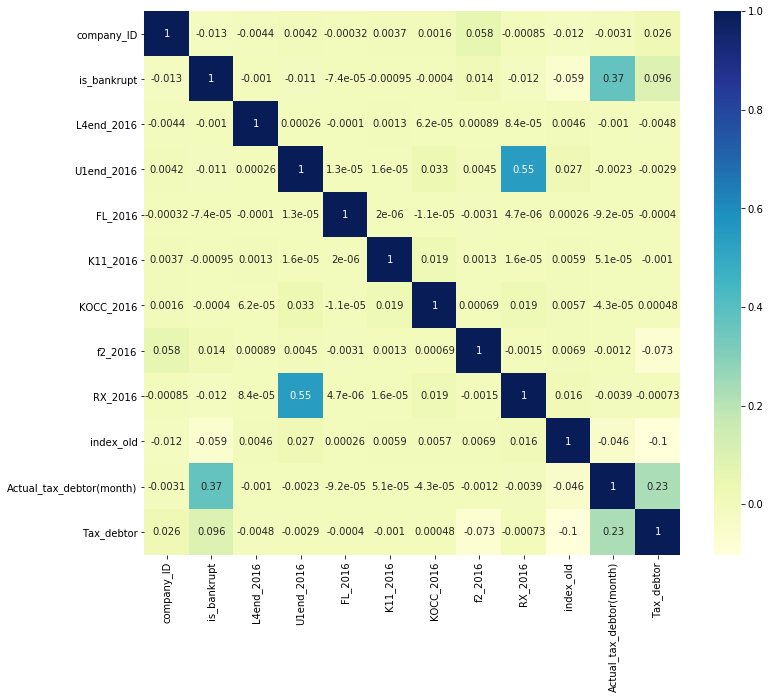

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(data_train.corr(),cmap="YlGnBu",annot=True,)

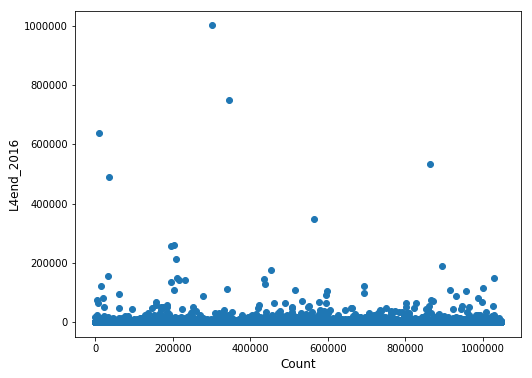

In [14]:
plt.figure(figsize=(8,6)) #коэф. ликвидности
plt.scatter(range(data_train.shape[0]),data_train["L4end_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('L4end_2016', fontsize=12)
plt.show()

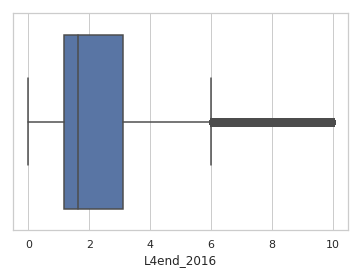

In [69]:
sns.set(style="whitegrid") #коэф. ликвидности
ax = sns.boxplot(x=data_train[data_train["L4end_2016"]<10]["L4end_2016"])

In [16]:
data_train = data_train[data_train["L4end_2016"]<10] #убрали все объекты где коэф. ликвидности >10
data_test = data_test[data_test["L4end_2016"]<10]

In [17]:
print(len(data_train[data_train["L4end_2016"]<10]))
print(len(data_test[data_test["L4end_2016"]<10]))
#коэф. ликвидности, если он выше 2 высокая платежеспособность или нерациональое использование средств. Предпологаем выше 10 - выбросы

928527
457267


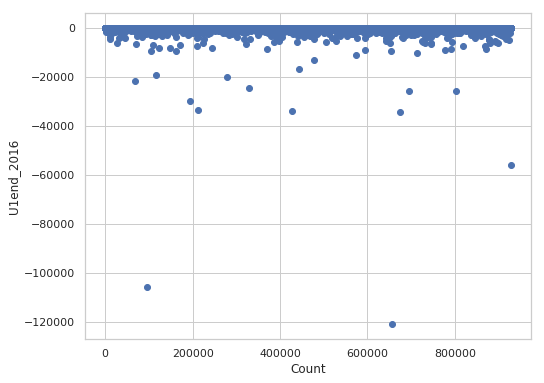

In [18]:
plt.figure(figsize=(8,6)) # Коэффициент финансовой независимости 
plt.scatter(range(data_train.shape[0]),data_train["U1end_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('U1end_2016', fontsize=12)
plt.show() 

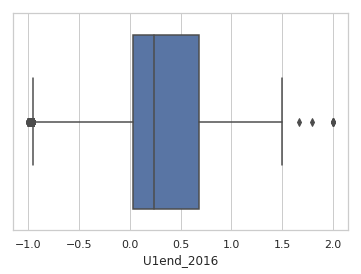

In [19]:
sns.set(style="whitegrid") # Коэффициент финансовой независимости 
ax = sns.boxplot(x=data_train[data_train["U1end_2016"]>-1]["U1end_2016"])

In [20]:
data_train = data_train[data_train["U1end_2016"]>-1] #удалили где  Коэффициент финансовой независимости ниже -1
data_test = data_test[data_test["U1end_2016"]>-1]
data_train = data_train[data_train["U1end_2016"]<1] #удалили где  Коэффициент финансовой независимости выше 1
data_test = data_test[data_test["U1end_2016"]<1]

In [21]:
print(len(data_train))
print(len(data_test))

789984
389038


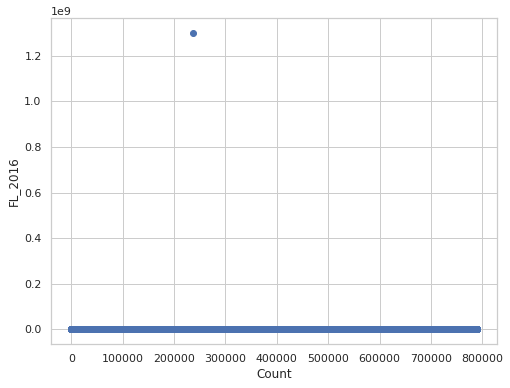

In [22]:
plt.figure(figsize=(8,6)) #Коэффициент финансового рычага 
plt.scatter(range(data_train["FL_2016"].shape[0]),data_train["FL_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('FL_2016', fontsize=12)
plt.show() 

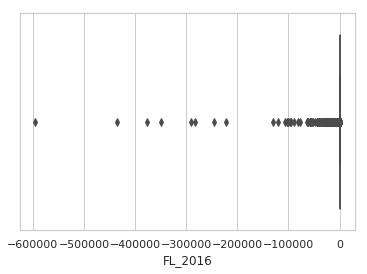

In [23]:
sns.set(style="whitegrid") # Коэффициент финансового рычага 
ax = sns.boxplot(x=data_train[data_train["FL_2016"]<10]["FL_2016"])

In [24]:
data_train = data_train[data_train["FL_2016"]<10] #удилили где Коэффициент финансового рычага  > 10
data_test = data_test[data_test["FL_2016"]<10]
data_train = data_train[data_train["FL_2016"]>-10] #удилили где Коэффициент финансового рычага  < -10
data_test = data_test[data_test["FL_2016"]>-10]

In [25]:
print(len(data_train))
print(len(data_test))

547393
269943


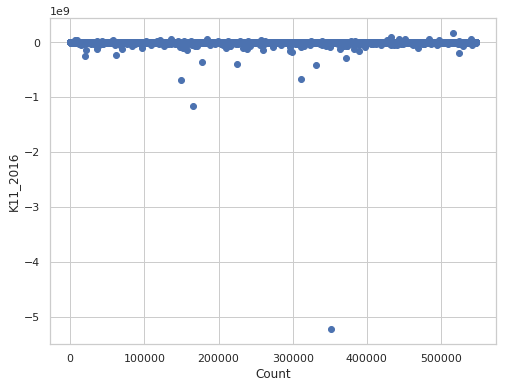

In [26]:
plt.figure(figsize=(8,6)) # Собственные средства в обороте 
plt.scatter(range(data_train["K11_2016"].shape[0]),data_train["K11_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('K11_2016', fontsize=12)
plt.show() 

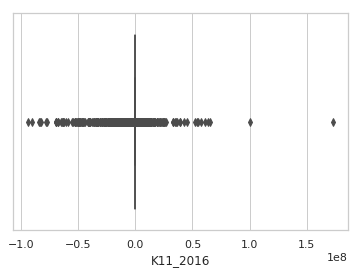

In [27]:
sns.set(style="whitegrid") #Собственные средства в обороте 
ax = sns.boxplot(x=data_train[data_train["K11_2016"]>-1e8]["K11_2016"])

In [28]:
data_train = data_train[data_train["K11_2016"]>-1e8] #удилили где Собственные средства в обороте мо модулю больше 1e8
data_test = data_test[data_test["K11_2016"]>-1e8]
data_train = data_train[data_train["K11_2016"]<1e8]
data_test = data_test[data_test["K11_2016"]<1e8]

In [29]:
print(len(data_train))
print(len(data_test))

547365
269918


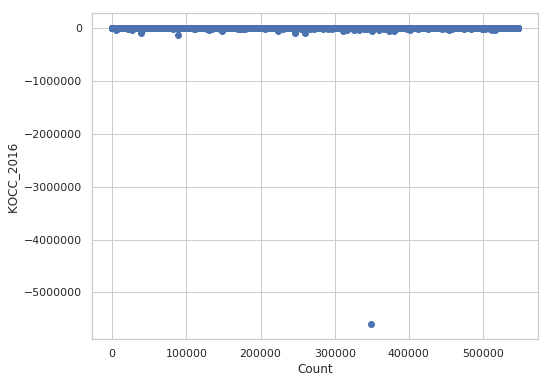

In [30]:
plt.figure(figsize=(8,6)) # Коэффициент обеспеченности собственными средствами 
plt.scatter(range(data_train["KOCC_2016"].shape[0]),data_train["KOCC_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('KOCC_2016 ', fontsize=12)
plt.show() 

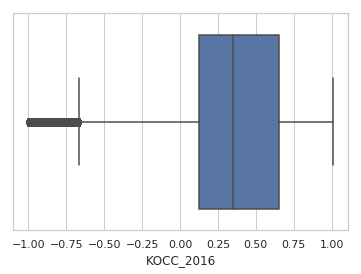

In [31]:
sns.set(style="whitegrid") #Коэффициент обеспеченности собственными средствами , нормой считается 0.1
ax = sns.boxplot(x=data_train[data_train["KOCC_2016"]>-1]["KOCC_2016"])

In [32]:
data_train = data_train[data_train["KOCC_2016"]>-1] #удилили где Собственные средства в обороте мо модулю больше 1
data_test = data_test[data_test["KOCC_2016"]>-1]
data_train = data_train[data_train["KOCC_2016"]<1]
data_test = data_test[data_test["KOCC_2016"]<1]

In [33]:
print(len(data_train))
print(len(data_test))

505394
249038


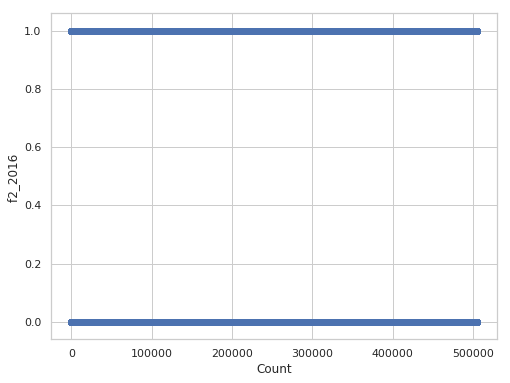

In [34]:
plt.figure(figsize=(8,6)) # Наличие/отсутствие формы 2 
plt.scatter(range(data_train["f2_2016"].shape[0]),data_train["f2_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('f2_2016 ', fontsize=12)
plt.show() 

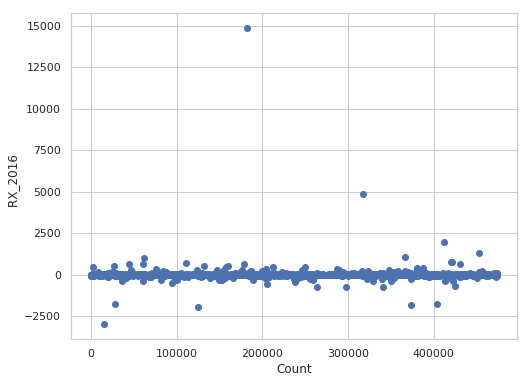

In [35]:
plt.figure(figsize=(8,6)) # Финансовая (чистая) рентабельность за 2016 год. Доступна только для организаций, у которых f2_2016 = True
plt.scatter(range(data_train[data_train["f2_2016"]==1]["RX_2016"].shape[0]),data_train[data_train["f2_2016"]==1]["RX_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('RX_2016  ', fontsize=12)
plt.show() 

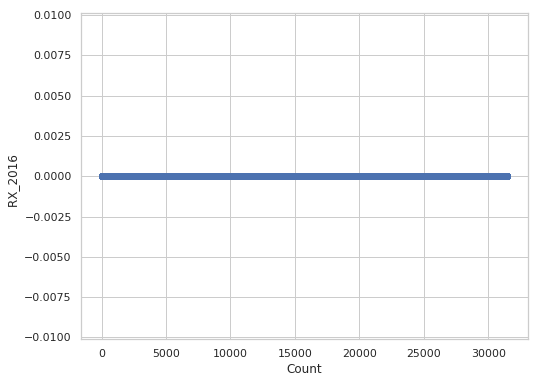

In [36]:
plt.figure(figsize=(8,6)) # Финансовая (чистая) рентабельность за 2016 год. Доступна только для организаций, у которых f2_2016 = True
plt.scatter(range(data_train[data_train["f2_2016"]==0]["RX_2016"].shape[0]),data_train[data_train["f2_2016"]==0]["RX_2016"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('RX_2016  ', fontsize=12)
plt.show() 

In [37]:
data_train_0 = copy.deepcopy(data_train[data_train["f2_2016"]==0])
data_train_1 = copy.deepcopy(data_train[data_train["f2_2016"]==1])
data_test_0 = copy.deepcopy(data_test[data_test["f2_2016"]==0])
data_test_1 = copy.deepcopy(data_test[data_test["f2_2016"]==1])

In [38]:
data_train_1 = data_train[data_train["f2_2016"]==1][data_train["RX_2016"]>-1][data_train["RX_2016"]<1]
data_test_1 = data_test[data_test["f2_2016"]==1][data_test["RX_2016"]>-1][data_test["RX_2016"]<1]

/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [39]:
data_train = copy.deepcopy(data_train_1.append(data_train_0))
data_test = copy.deepcopy(data_test_1.append(data_test_0))

In [40]:
print(len(data_train))
print(len(data_test))

483596
238384


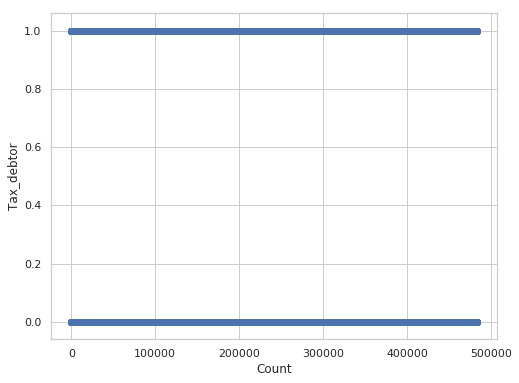

In [41]:
plt.figure(figsize=(8,6)) # Наличие/отсутствие формы 2 
plt.scatter(range(data_train["Tax_debtor"].shape[0]),data_train["Tax_debtor"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tax_debtor', fontsize=12)
plt.show() 

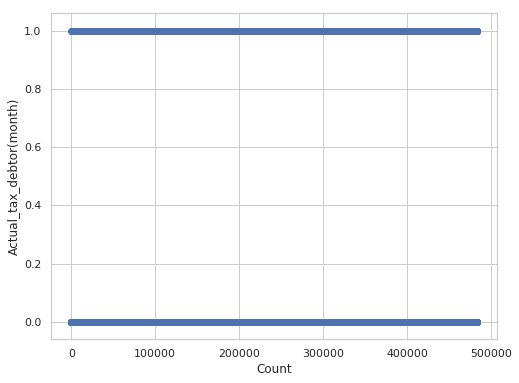

In [42]:
plt.figure(figsize=(8,6)) # Наличие/отсутствие формы 2 
plt.scatter(range(data_train["Actual_tax_debtor(month)"].shape[0]),data_train["Actual_tax_debtor(month)"])
plt.xlabel('Count', fontsize=12)
plt.ylabel('Actual_tax_debtor(month)', fontsize=12)
plt.show() 

In [43]:
print(len(data_train[data_train["is_bankrupt"]==0])) #Равновесненько
print(len(data_train[data_train["is_bankrupt"]==1]))

481161
2435


## Задача 1

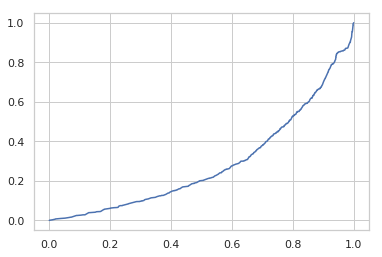

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(data_train["is_bankrupt"],data_train["index_old"])
plt.plot(fpr, tpr)
plt.show()

In [45]:
import heapq
#heapq.nlargest(10000,data_train[data_train["index_old"]])
tmp = copy.deepcopy(data_train)
l = sorted(data_train["index_old"], reverse=True)[:10000]
s = 0
i = 0
tmp1 = copy.deepcopy(tmp[tmp["index_old"] == l[i]])
s = s + l.count(l[i])
for j in range(0,l.count(l[i])):
    l.remove(l[i])
while (s < 10000):
    tmp1 = tmp1.append(copy.deepcopy(tmp[tmp["index_old"] == l[i]]))
    print(len(tmp1))
    s = s + l.count(l[i])
    for j in range(0,l.count(l[i])):
        l.remove(l[i])
tmp1.drop(tmp1.index[10000:len(tmp1)], inplace=True)
#len(tmp1)
tmp1["index_old"] = 1

3692
3851
5221
9243
9783
9793
14664


In [46]:
from sklearn.metrics import classification_report
print(classification_report(tmp1["is_bankrupt"], tmp1["index_old"]))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      9982
          1       0.00      1.00      0.00        18

avg / total       0.00      0.00      0.00     10000



/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Задача 2

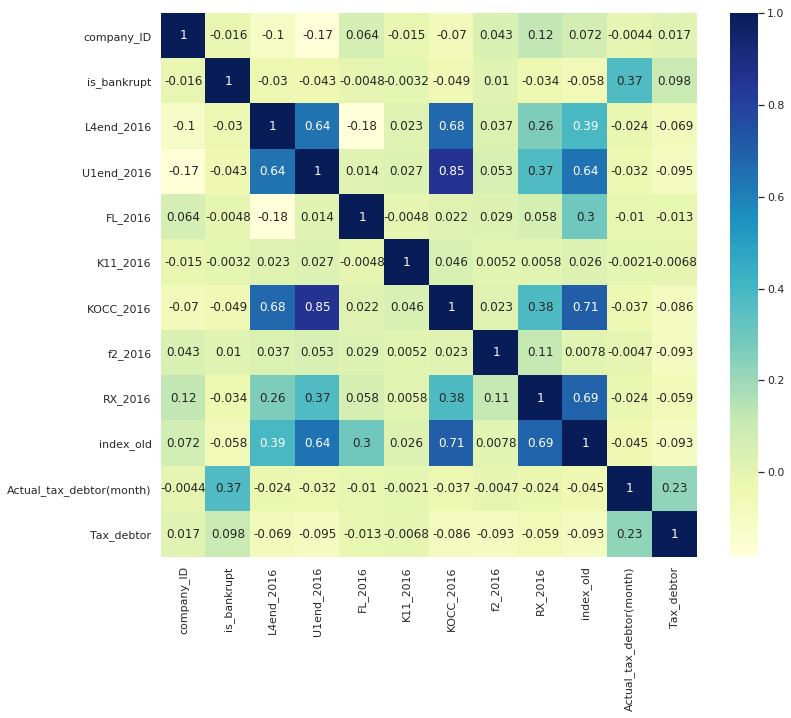

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(data_train.corr(),cmap="YlGnBu",annot=True,)

Исходя из матрицы корреляции признаков, можно заметить что на банкротство компании влияет наличие долгов в данный момент. Наличие долгов вообще так же оказывает влияние, но это можно списать на корерляцию между наличием долгов сейчас и наличием долгов вообще, так как если есть долг сейчас будет долг совсем. Остальные признаки близки к 0 что свидетельсвтует о отсутствии линейной связи между признаками.

In [51]:
train_Y = data_train['is_bankrupt']
train_X = data_train.drop(['is_bankrupt'], axis=1, inplace=False)
train_X = train_X.drop(['company_ID'], axis=1, inplace=False)
test_X = data_test.drop(['company_ID'], axis=1, inplace=False)

# Модель A(Дерево решений)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [52]:
DTC = DecisionTreeClassifier()
params_DTC = {"max_depth" : np.arange(1, 20),
             "min_samples_leaf": [0.001, 0.003, 0.005, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.05],
             "max_features": [0.5, 0.6, 0.7, 0.8, 0.9, 1]
             }
DTC_CV = GridSearchCV(estimator = DTC, param_grid = params_DTC, cv = 3, n_jobs = -1, scoring ="roc_auc")
DTC_CV.fit(train_X, train_Y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'min_samples_leaf': [0.001, 0.003, 0.005, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.05], 'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [53]:
best_hyperparams = DTC_CV.best_params_
print("Best hyperparams:\n", best_hyperparams)
DTC_best_model = DTC_CV.best_estimator_

Best hyperparams:
 {'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 0.005}


0.9118311476996601


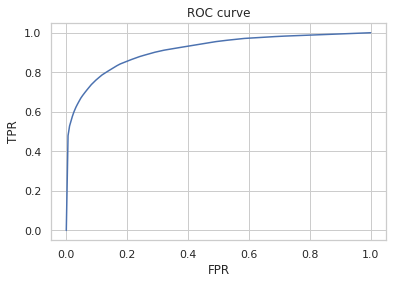

In [54]:
predictions = DTC_best_model.predict_proba(train_X)

print(roc_auc_score(train_Y, predictions[:,1]))

fpr, tpr, _ = roc_curve(train_Y, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Значимость переменных

<IPython.core.display.Javascript object>


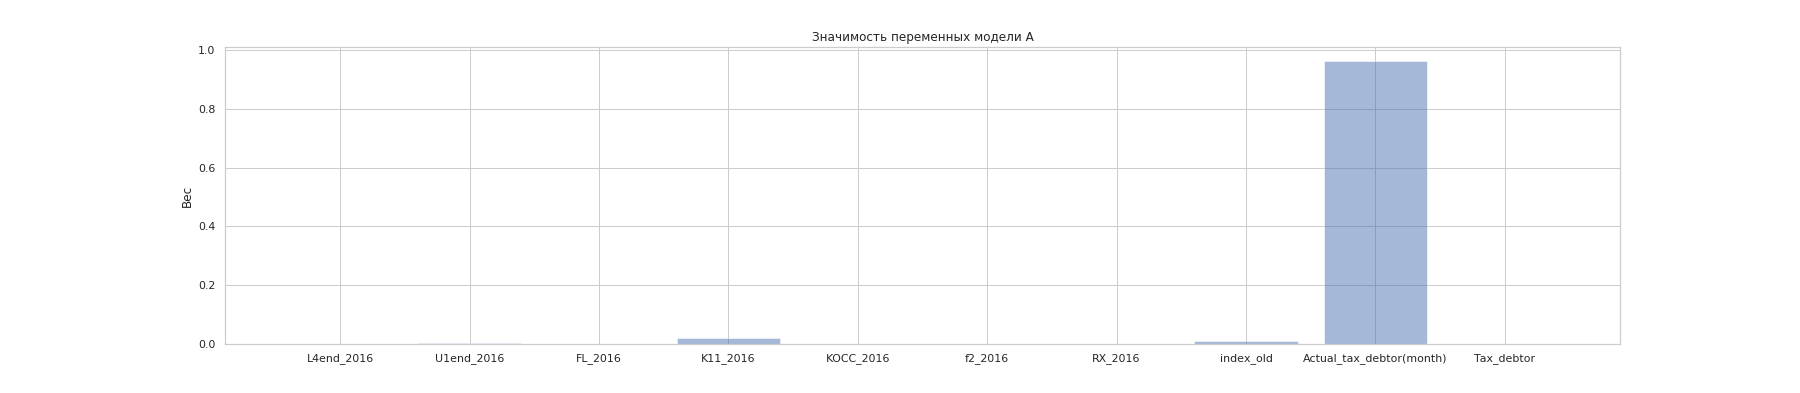

In [66]:
%matplotlib gtk
Y_pos = np.arange(len(train_X.columns))
plt.bar(Y_pos, DTC_best_model.feature_importances_, align='center', alpha=0.5)
plt.xticks(Y_pos, train_X.columns)
plt.ylabel('Вес')
plt.title('Значимость переменных модели А')
 
plt.show()

# Модель B(RandomForestClassifier)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [56]:
RFC = RandomForestClassifier()
params_RFC = {"n_estimators" : np.arange(1, 21, 5),
             "max_features": [0.5, 0.6, 0.7, 0.8, 0.9, 1]
             }
RFC_CV = GridSearchCV(estimator = RFC, param_grid = params_RFC, cv = 3, n_jobs = -1, scoring ="roc_auc")
RFC_CV.fit(train_X, train_Y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 1,  6, 11, 16]), 'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [57]:
best_hyperparams = RFC_CV.best_params_
print("Best hyperparams:\n", best_hyperparams)
RFC_best_model = RFC_CV.best_estimator_

Best hyperparams:
 {'max_features': 0.8, 'n_estimators': 16}


0.9999903975414838


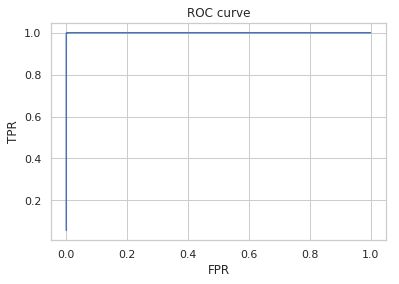

In [58]:
predictions = RFC_best_model.predict_proba(train_X)

print(roc_auc_score(train_Y, predictions[:,1]))

fpr, tpr, _ = roc_curve(train_Y, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

<IPython.core.display.Javascript object>


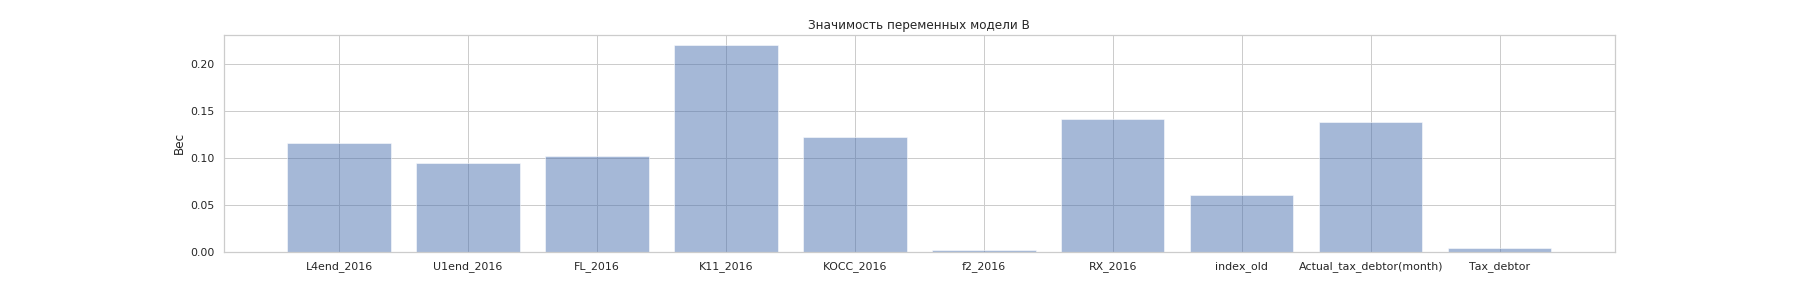

In [71]:
%matplotlib gtk
Y_pos = np.arange(len(train_X.columns))
plt.bar(Y_pos, RFC_best_model.feature_importances_, align='center', alpha=0.5)
plt.xticks(Y_pos, train_X.columns)
plt.ylabel('Вес')
plt.title('Значимость переменных модели B')
 
plt.show()